311: Average Resolution Time Analysis

Prepared by Ivanna Morales

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
import scipy.stats as stats
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import plotly.express as px

I. Data Cleaning and Preparation

In [2]:
# List of file names
file_names = ['../../data/2011.csv', '../../data/2012.csv', '../../data/2013.csv', '../../data/2014.csv', '../../data/2015.csv', 
              '../../data/2016.csv', '../../data/2017.csv', '../../data/2018.csv', '../../data/2019.csv', '../../data/2020.csv',
              '../../data/2021.csv', '../../data/2022.csv', '../../data/2023.csv']

# Read the data from the CSV files into a list of DataFrames to be combined and filter the first row of all of the files except the first one
data_list = []

for file in file_names:
    data = pd.read_csv(file,low_memory=False)
    data_list.append(data)

# Concatenate the DataFrames
data_total = pd.concat(data_list, ignore_index=True)

# Save the concatenated data to a new CSV file
data_total.to_csv('data_total2.csv', index=False)

data_total.head()

,neighborhood,open_dt,city_council_district,precinct,subject,neighborhood_services_district,case_enquiry_id,on_time,sla_target_dt,source,...,closure_reason,location_zipcode,closed_dt,case_title,longitude,queue,geom_4326,case_status,_id,fire_district
0,Greater Mattapan,2011-06-30 21:32:33,3,1714,Public Works Department,7,101000295613,ONTIME,2011-07-14 21:32:32,Employee Generated,...,Case Closed Case Resolved replaced 100 amp fus...,NaN,2011-07-01 01:06:58,Street Light Outages,-71.077221,PWDx_Street Light Outages,0101000020E6100000CC4F6F30F1C451C0ADBC83F5C122...,Closed,1,8
1,Roslindale,2011-06-30 22:18:31,5,2008,Public Works Department,10,101000295614,ONTIME,2011-07-04 22:18:31,Self Service,...,Case Closed Case Scheduled Items have been sch...,2131.0,2011-07-01 02:12:43,Schedule a Bulk Item Pickup,-71.144741,PWDx_Schedule a Bulk Item Pickup,0101000020E6100000C960F36E43C951C06CE46A2F5524...,Closed,2,12
2,West Roxbury,2011-06-30 22:28:04,6,2017,Transportation - Traffic Division,12,101000295615,ONTIME,2011-08-14 22:28:04,Self Service,...,Case Closed Case Resolved No Sidewalk and poor...,NaN,2011-08-01 11:21:46,New Sign Crosswalk or Pavement Marking,-71.169805,BTDT_Engineering_New Sign and Pavement Marking...,0101000020E6100000B311E014DECA51C0A1102F826F26...,Closed,3,NaN
3,Hyde Park,2011-06-30 23:03:48,5,1816,Public Works Department,10,101000295616,OVERDUE,2011-07-14 23:03:48,Self Service,...,Case Closed Case Resolved completed,2136.0,2011-07-22 12:13:45,Street Light Outages,-71.115631,PWDx_Street Light_Pending_Contractor (Internal),0101000020E61000003219CE7E66C751C0DDF2D930F41F...,Closed,4,12
4,Dorchester,2011-06-30 23:12:31,3,1309,Public Works Department,7,101000295617,ONTIME,NaN,Constituent Call,...,Case Closed Case Resolved,NaN,2011-07-01 02:12:38,Highway Maintenance,-71.056878,PWDx_District 03: North Dorchester,0101000020E6100000615079E5A3C351C0C71CEA6D3F28...,Closed,5,7


II. Extracting Resolution Times 

In [3]:
data_total = pd.read_csv('data_total2.csv')
df = data_total[['open_dt', 'closed_dt', 'queue', 'department', 'neighborhood']]
df.head()
# Calculate Resolution Times For Each Job
df.loc[:,'resolution_time'] = (pd.to_datetime(df['closed_dt']) - pd.to_datetime(df['open_dt'])).dt.total_seconds() / 3600
df.loc[:,'year'] = pd.to_datetime(df['open_dt']).dt.year


/var/folders/x_/8pz94hbn65n99wfln5fd_p840000gn/T/ipykernel_39457/2359060929.py:1: DtypeWarning: Columns (14,20) have mixed types. Specify dtype option on import or set low_memory=False.
  data_total = pd.read_csv('data_total2.csv')
/var/folders/x_/8pz94hbn65n99wfln5fd_p840000gn/T/ipykernel_39457/2359060929.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:,'resolution_time'] = (pd.to_datetime(df['closed_dt']) - pd.to_datetime(df['open_dt'])).dt.total_seconds() / 3600
/var/folders/x_/8pz94hbn65n99wfln5fd_p840000gn/T/ipykernel_39457/2359060929.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https

1. Average Goal Resolution time by QUEUE 

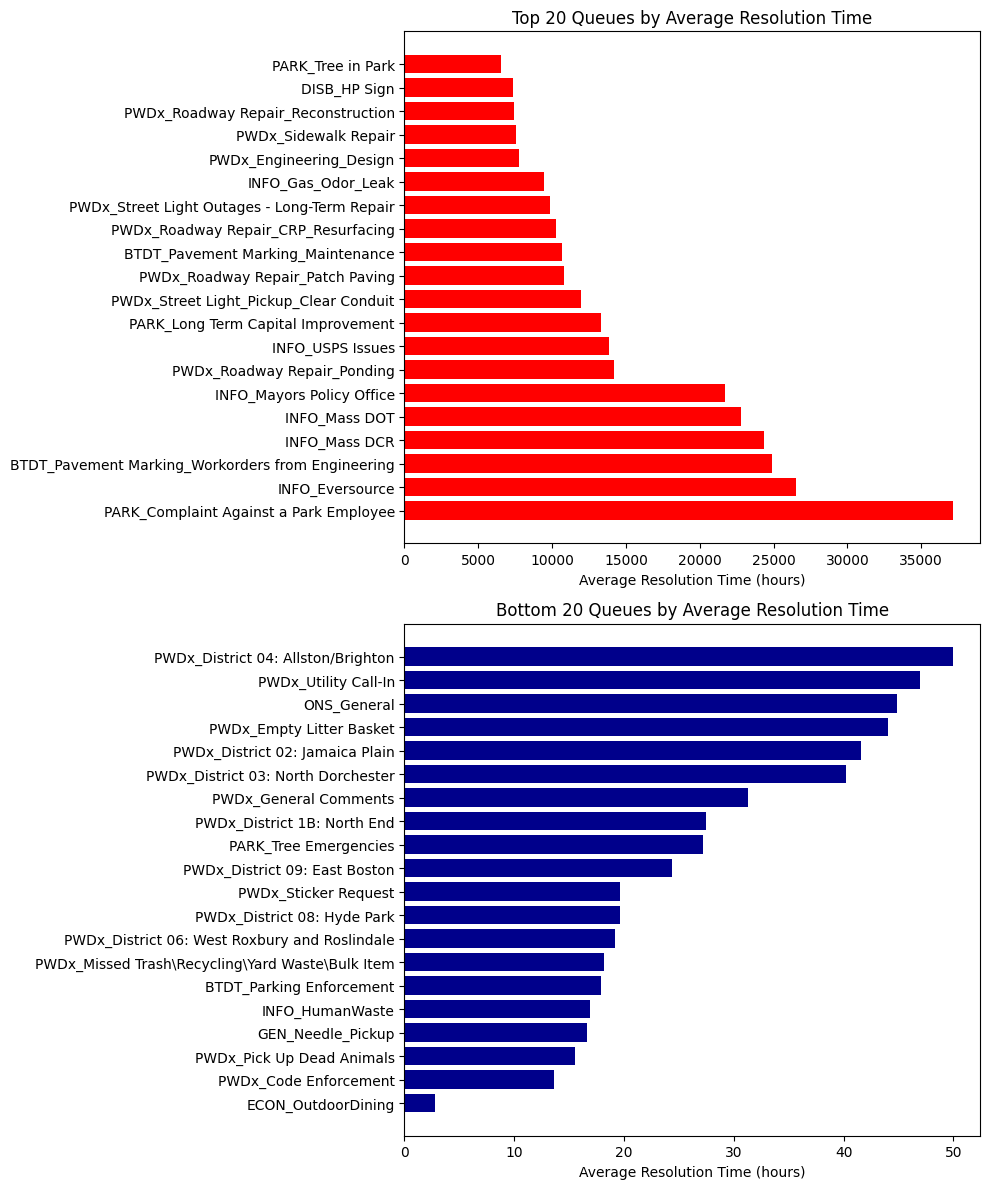

In [4]:

# Group by 'queue' and then 'neighborhood' and calculate the average resolution time for both
average_resolution_by_queue = df.groupby('queue')['resolution_time'].mean()

# Define the number of top queue values to display
N = 20  # Change this value as needed

# Sort the average resolution by queue in descending order to find top queues
top_queues = average_resolution_by_queue.sort_values(ascending=False).head(N)

# Sort the average resolution by queue in ascending order to find bottom queues
bottom_queues = average_resolution_by_queue.sort_values().head(N)

# Create a figure with subplots
fig, axes = plt.subplots(2, 1, figsize=(10, 12))

# Plot the top N queues
axes[0].barh(top_queues.index, top_queues, color='red')
axes[0].set_xlabel('Average Resolution Time (hours)')
axes[0].set_title(f'Top {N} Queues by Average Resolution Time')

# Plot the bottom N queues
axes[1].barh(bottom_queues.index, bottom_queues, color='darkblue')
axes[1].set_xlabel('Average Resolution Time (hours)')
axes[1].set_title(f'Bottom {N} Queues by Average Resolution Time')

plt.tight_layout()
plt.show()


(Not Anuallized) Here we can see which queues have the largest resolution times and which have the lowest. There is a large range of goal resolution times for each queue type. To get a better sense of resolution trends, we can break this down into the most commonly used queues and then look at how the resolution times change throughout the years.

In [5]:
import pandas as pd

# Assuming you have a DataFrame named 'data' with the relevant columns

# Step 1: Filter data by date range
start_date = '2011-01-01'
end_date = '2023-12-31'
data = df[(df['closed_dt'] >= start_date) & (df['closed_dt'] <= end_date)]

# Step 2: Extract the year
data['year'] = pd.to_datetime(data['closed_dt']).dt.year

# Step 3: Group by 'year' and 'queue' and calculate the average goal resolution time
average_resolution_by_queue = data.groupby(['year', 'queue'])['resolution_time'].mean().reset_index()

# Display the resulting DataFrame
print(average_resolution_by_queue)


/var/folders/x_/8pz94hbn65n99wfln5fd_p840000gn/T/ipykernel_39457/1871526316.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['year'] = pd.to_datetime(data['closed_dt']).dt.year


      year                                              queue  resolution_time
0     2011                          BTDT_AVRS Interface Queue       252.981272
1     2011                             BTDT_Abandoned Bicycle       681.139491
2     2011                                BTDT_Administration        64.202474
3     2011                       BTDT_Broken Meter Complaints       171.521698
4     2011  BTDT_Engineering_New Sign and Pavement Marking...       526.933377
...    ...                                                ...              ...
1830  2023        PWDx_Street Light_Upgrade Existing Lighting       901.388426
1831  2023                               PWDx_Utility Call-In        65.845833
1832  2023                        PWDx_Utility Casting Repair      1168.293990
1833  2023                            PWDx_WM_Mattress_Pickup       226.800519
1834  2023              PWDx_Work Hours-Loud Noise Complaints       781.401356

[1835 rows x 3 columns]


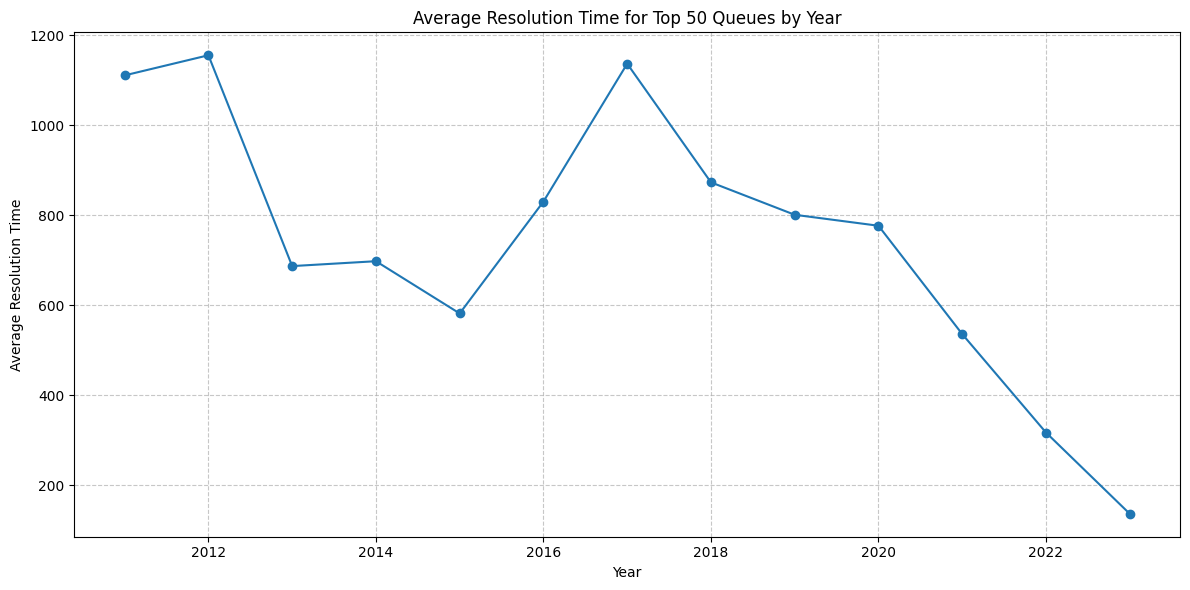

In [6]:
# Create an empty DataFrame to store the results

N=50
# Create an empty list to store the results
results = []

# Iterate over years
for year in range(2011, 2024):
    # Filter data for the specific year
    year_data = df[df['year'] == year]
    
    # Count the occurrences of each queue value for the specific year
    queue_counts = year_data['queue'].value_counts()
    
    # Get the top N most common queues for the specific year
    top_queues = queue_counts.head(N).index.tolist()
    
    # Filter data for the top N queues of the specific year
    filtered_data = year_data[year_data['queue'].isin(top_queues)]
    
    # Calculate the mean response time for the top N queues of the specific year
    average_response_time = filtered_data['resolution_time'].mean()
    
    # Append the result to the list
    results.append({'year': year, 'average_response_time': average_response_time})

# Create a DataFrame from the list of results
result_df = pd.DataFrame(results)

# Create a line plot
plt.figure(figsize=(12, 6))
plt.plot(result_df['year'], result_df['average_response_time'], marker='o', linestyle='-')
plt.xlabel('Year')
plt.ylabel('Average Resolution Time')
plt.title(f'Average Resolution Time for Top {N} Queues by Year')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


This plot represents the raw average goal resolution time for the 50 most used queues of each year. We can see that there seems to be a significant drop in resolution time from 2020-2023. To get a better sense of the patterns we can look at the log of the avergae times.

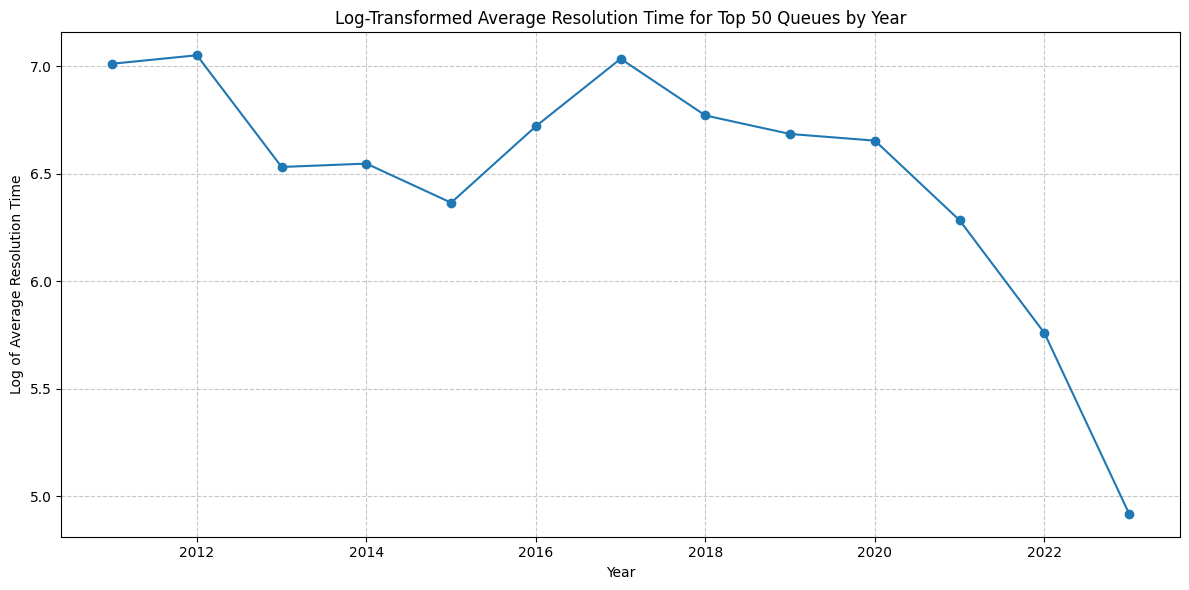

In [7]:
# Calculate the log of the average response times
result_df['log_response_time'] = np.log(result_df['average_response_time'])

# Create a line plot of the log-transformed data
plt.figure(figsize=(12, 6))
plt.plot(result_df['year'], result_df['log_response_time'], marker='o', linestyle='-')
plt.xlabel('Year')
plt.ylabel('Log of Average Resolution Time')
plt.title(f'Log-Transformed Average Resolution Time for Top {N} Queues by Year')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

As we can see, the logarithmic plot uncovers a more definite decrease from 2020-2023. 

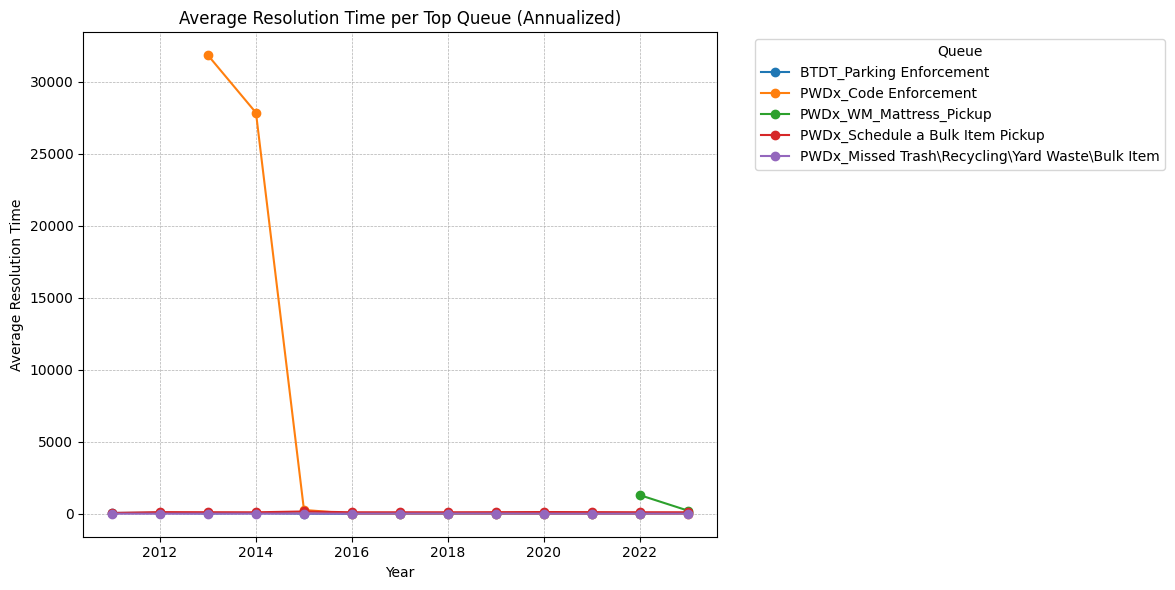

In [8]:
N=5
# Group by year and queue, and calculate the average response time
average_response_time = df.groupby(['year', 'queue'])['resolution_time'].mean().unstack()

# Create a bar plot for each top queue
plt.figure(figsize=(12, 6))
for queue in top_queues[:N]:
    plt.plot(average_response_time.index, average_response_time[queue], marker='o', label=queue)

plt.xlabel('Year')
plt.ylabel('Average Resolution Time')
plt.title('Average Resolution Time per Top Queue (Annualized)')
plt.legend(title='Queue', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

More specifically, we can see how the raw resolution time of the 20 most commonly used queues have changed over the years. Theres seems to be a relatively constant resolution time for these queues, but we can have a more detailed view of changes in time using the log.

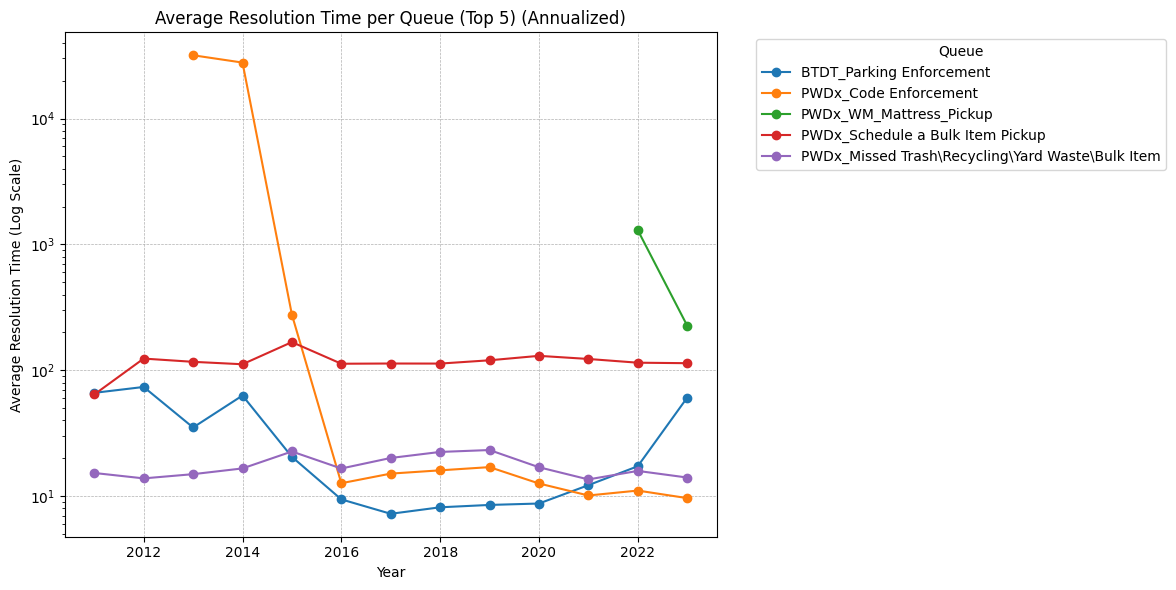

In [9]:
average_response_time = df.groupby(['year', 'queue'])['resolution_time'].mean().unstack()

# Create a bar plot for each top queue with a logarithmic scale
plt.figure(figsize=(12, 6))
for queue in top_queues[:N]:
    plt.semilogy(average_response_time.index, average_response_time[queue], marker='o', label=queue)

plt.xlabel('Year')
plt.ylabel('Average Resolution Time (Log Scale)')
plt.title('Average Resolution Time per Queue (Top 5) (Annualized)')
plt.legend(title='Queue', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

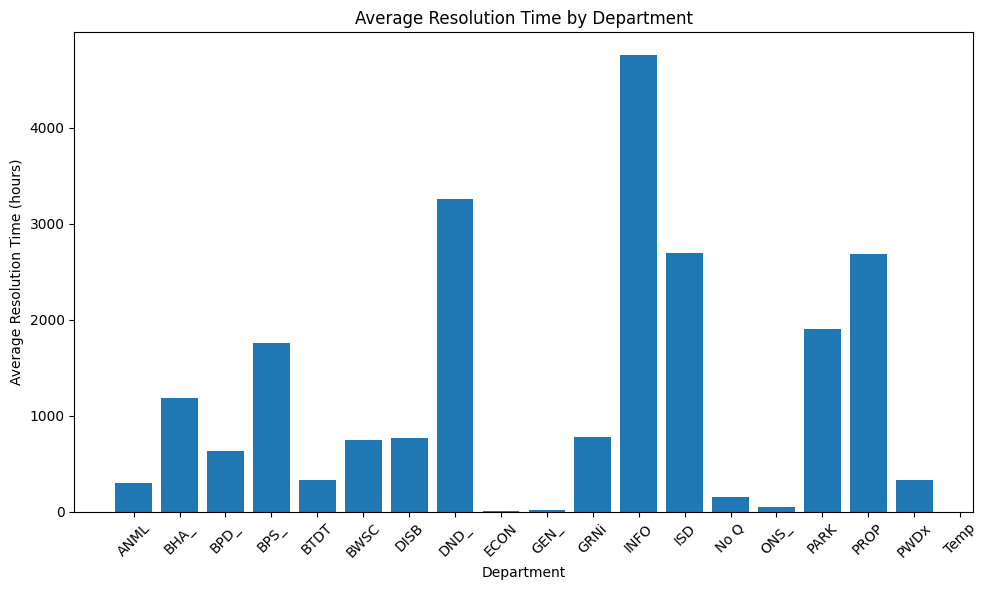

In [10]:
average_resolution_by_dept = df.groupby('department')['resolution_time'].mean()

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(average_resolution_by_dept.index, average_resolution_by_dept.values)
plt.xlabel('Department')
plt.ylabel('Average Resolution Time (hours)')
plt.title('Average Resolution Time by Department')
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.tight_layout()
plt.show()



For all years 2011-2023, queues in the Informatuon Channel, Department of Neighborhood Development, Boston Public Schools, Inspectional Services, Parks, and Property Management yielded the slowest average goal resolution times. Possible exploratory research for next deliverable -> The differences in response time for each queue within a departments by year. Determine which departments are most effective in their goal resolution times.

III. There are 181 unique Queues in the dataset, which makes it difficult to determine trends in the resolution times by Queue. However we were able to extract the average resolution time of the 50 most used queues of each year. This allows us to make some high-level inferences about the trends in resolution time of the service. In these initial plots, there is a significant drop in resolution time between 2020 and 2023. 

II. Resolution Time By Queue AND Neighborhood: 

Exploratory Data Analysis:

In [11]:
# Filtering out records with missing closed_dt or neighborhood
data_2023 = df[df['year'] == 2023]
filtered_df = data_2023.dropna(subset=['neighborhood'])

# Calculating average resolution time by queue (subject) and neighborhood
avg_resolution_time_by_queue = filtered_df.groupby('queue')['resolution_time'].mean()
avg_resolution_time_by_neighborhood = filtered_df.groupby('neighborhood')['resolution_time'].mean()

avg_resolution_time_by_queue.head(), avg_resolution_time_by_neighborhood.head()


(queue
 ANML02_LostFound        14.523928
 ANML_General            23.283213
 BHA_General           1221.560556
 BPD_Administrative       3.692619
 BPD_Districts           34.045505
 Name: resolution_time, dtype: float64,
 neighborhood
                       124.703641
 Allston               104.138801
 Allston / Brighton    127.850664
 Back Bay              113.216915
 Beacon Hill            89.133697
 Name: resolution_time, dtype: float64)

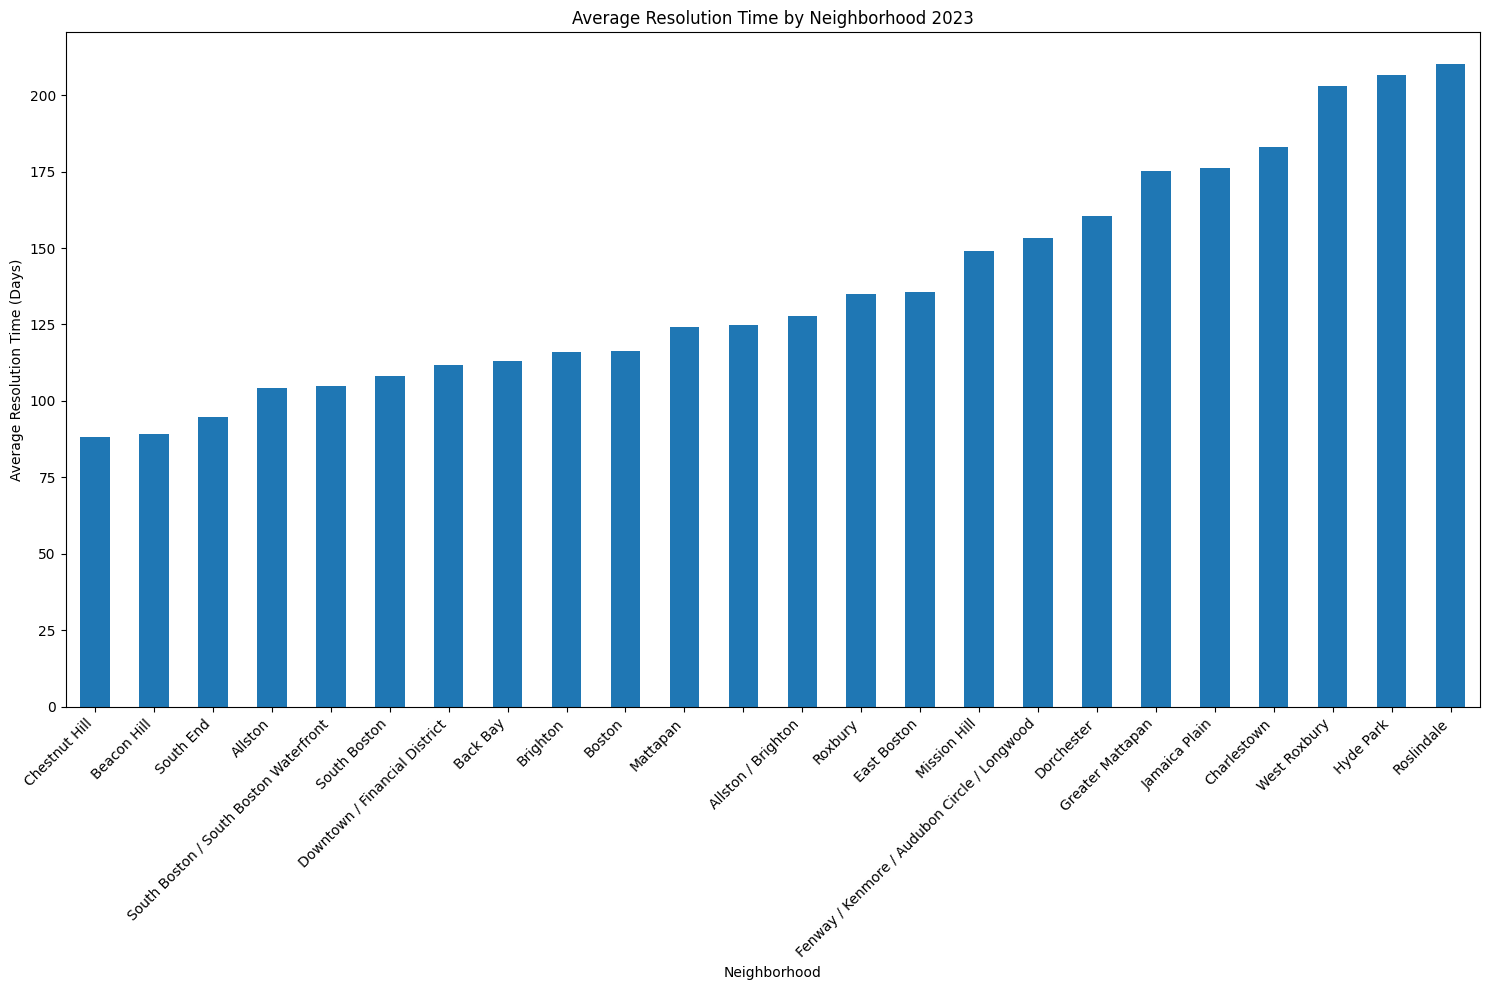

In [12]:
# Plotting the average resolution time by neighborhood
plt.figure(figsize=(15, 10))
avg_resolution_time_by_neighborhood.sort_values().plot(kind='bar')
plt.title('Average Resolution Time by Neighborhood 2023')
plt.xlabel('Neighborhood')
plt.ylabel('Average Resolution Time (Days)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In the year 2023, we can see a range of average resolution times of  aound 80-250 days between the neighborhoods, Chestnut Hill being the lowest and Rosindale the largest. This could be due to a discrepancy in submission counts, as well as unbalanced data regarding the resolution times of each subject.

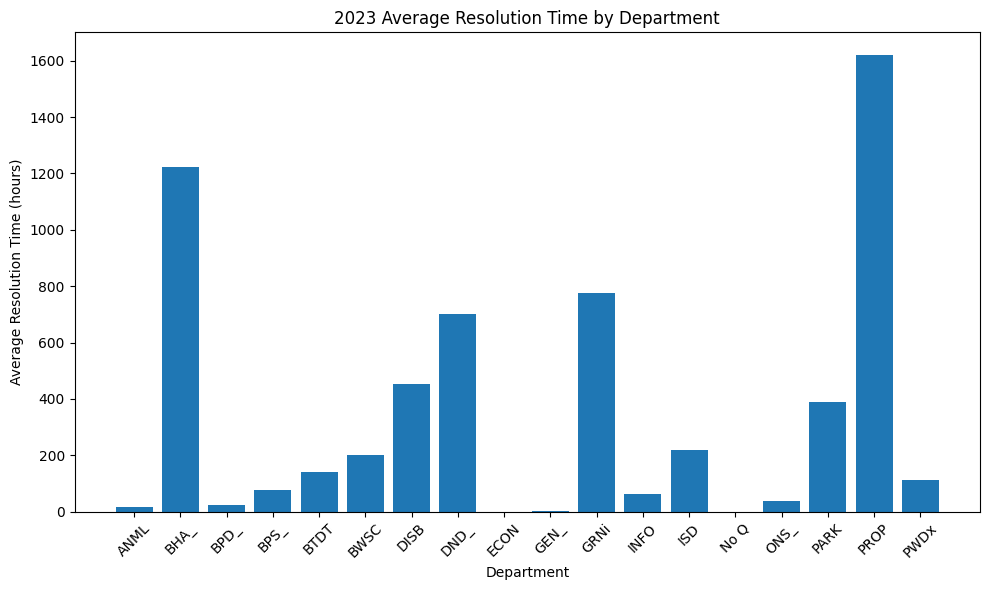

In [13]:
average_resolution_by_dept = filtered_df.groupby('department')['resolution_time'].mean()

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(average_resolution_by_dept.index, average_resolution_by_dept.values)
plt.xlabel('Department')
plt.ylabel('Average Resolution Time (hours)')
plt.title('2023 Average Resolution Time by Department')
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.tight_layout()
plt.show()

Looking at the resolution time in hours of each department in 2023, we do see a large inbalance in the resolution times by type of request as each department serves its a subset of requests. 

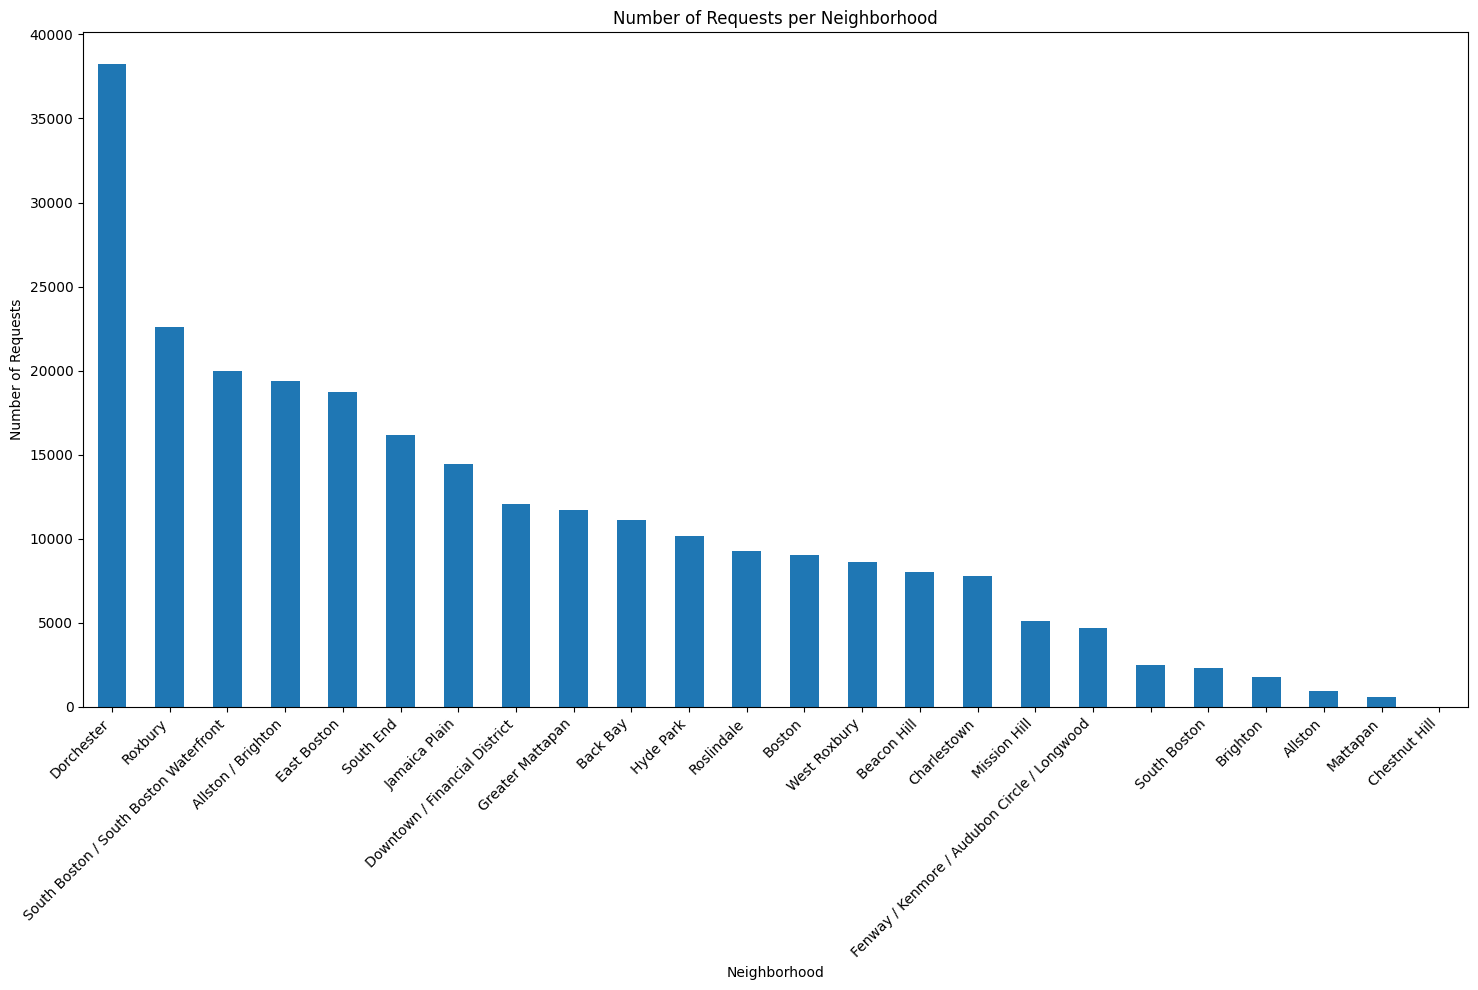

In [14]:
# Counting the number of requests per neighborhood
requests_per_neighborhood = filtered_df['neighborhood'].value_counts()

# Plotting the count of requests per neighborhood
plt.figure(figsize=(15, 10))
requests_per_neighborhood.plot(kind='bar')
plt.title('Number of Requests per Neighborhood')
plt.xlabel('Neighborhood')
plt.ylabel('Number of Requests')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Taking a look at the general number of requests in the dataset for all years, we can confirm that some of the neighborhoods with lower average resolution times in the previous graph do have lower submission counts relative to the other neighborhoods.

In [15]:
# Calculating the top 5 most used queues for each neighborhood
top_queues_per_neighborhood = filtered_df.groupby('neighborhood')['queue'].value_counts().groupby(level=0).head(5)

top_queues_per_neighborhood.head(25)  # Displaying the top 5 queues for the first 5 neighborhoods as an example

neighborhood        queue                                           
                    INFO_General Comments Complaints Compliments         624
                    BTDT_General Comments                                200
                    PWDx_Missed Trash\Recycling\Yard Waste\Bulk Item     197
                    PWDx_WM_Mattress_Pickup                              111
                    PARK_Park Improvement Requests                       107
Allston             BTDT_Parking Enforcement                             164
                    PWDx_District 04: Allston/Brighton                   163
                    PWDx_Code Enforcement                                139
                    PWDx_WM_Mattress_Pickup                               64
                    PARK_Maintenance_Region 4                             58
Allston / Brighton  BTDT_Parking Enforcement                            3365
                    PWDx_District 04: Allston/Brighton                  3330
       

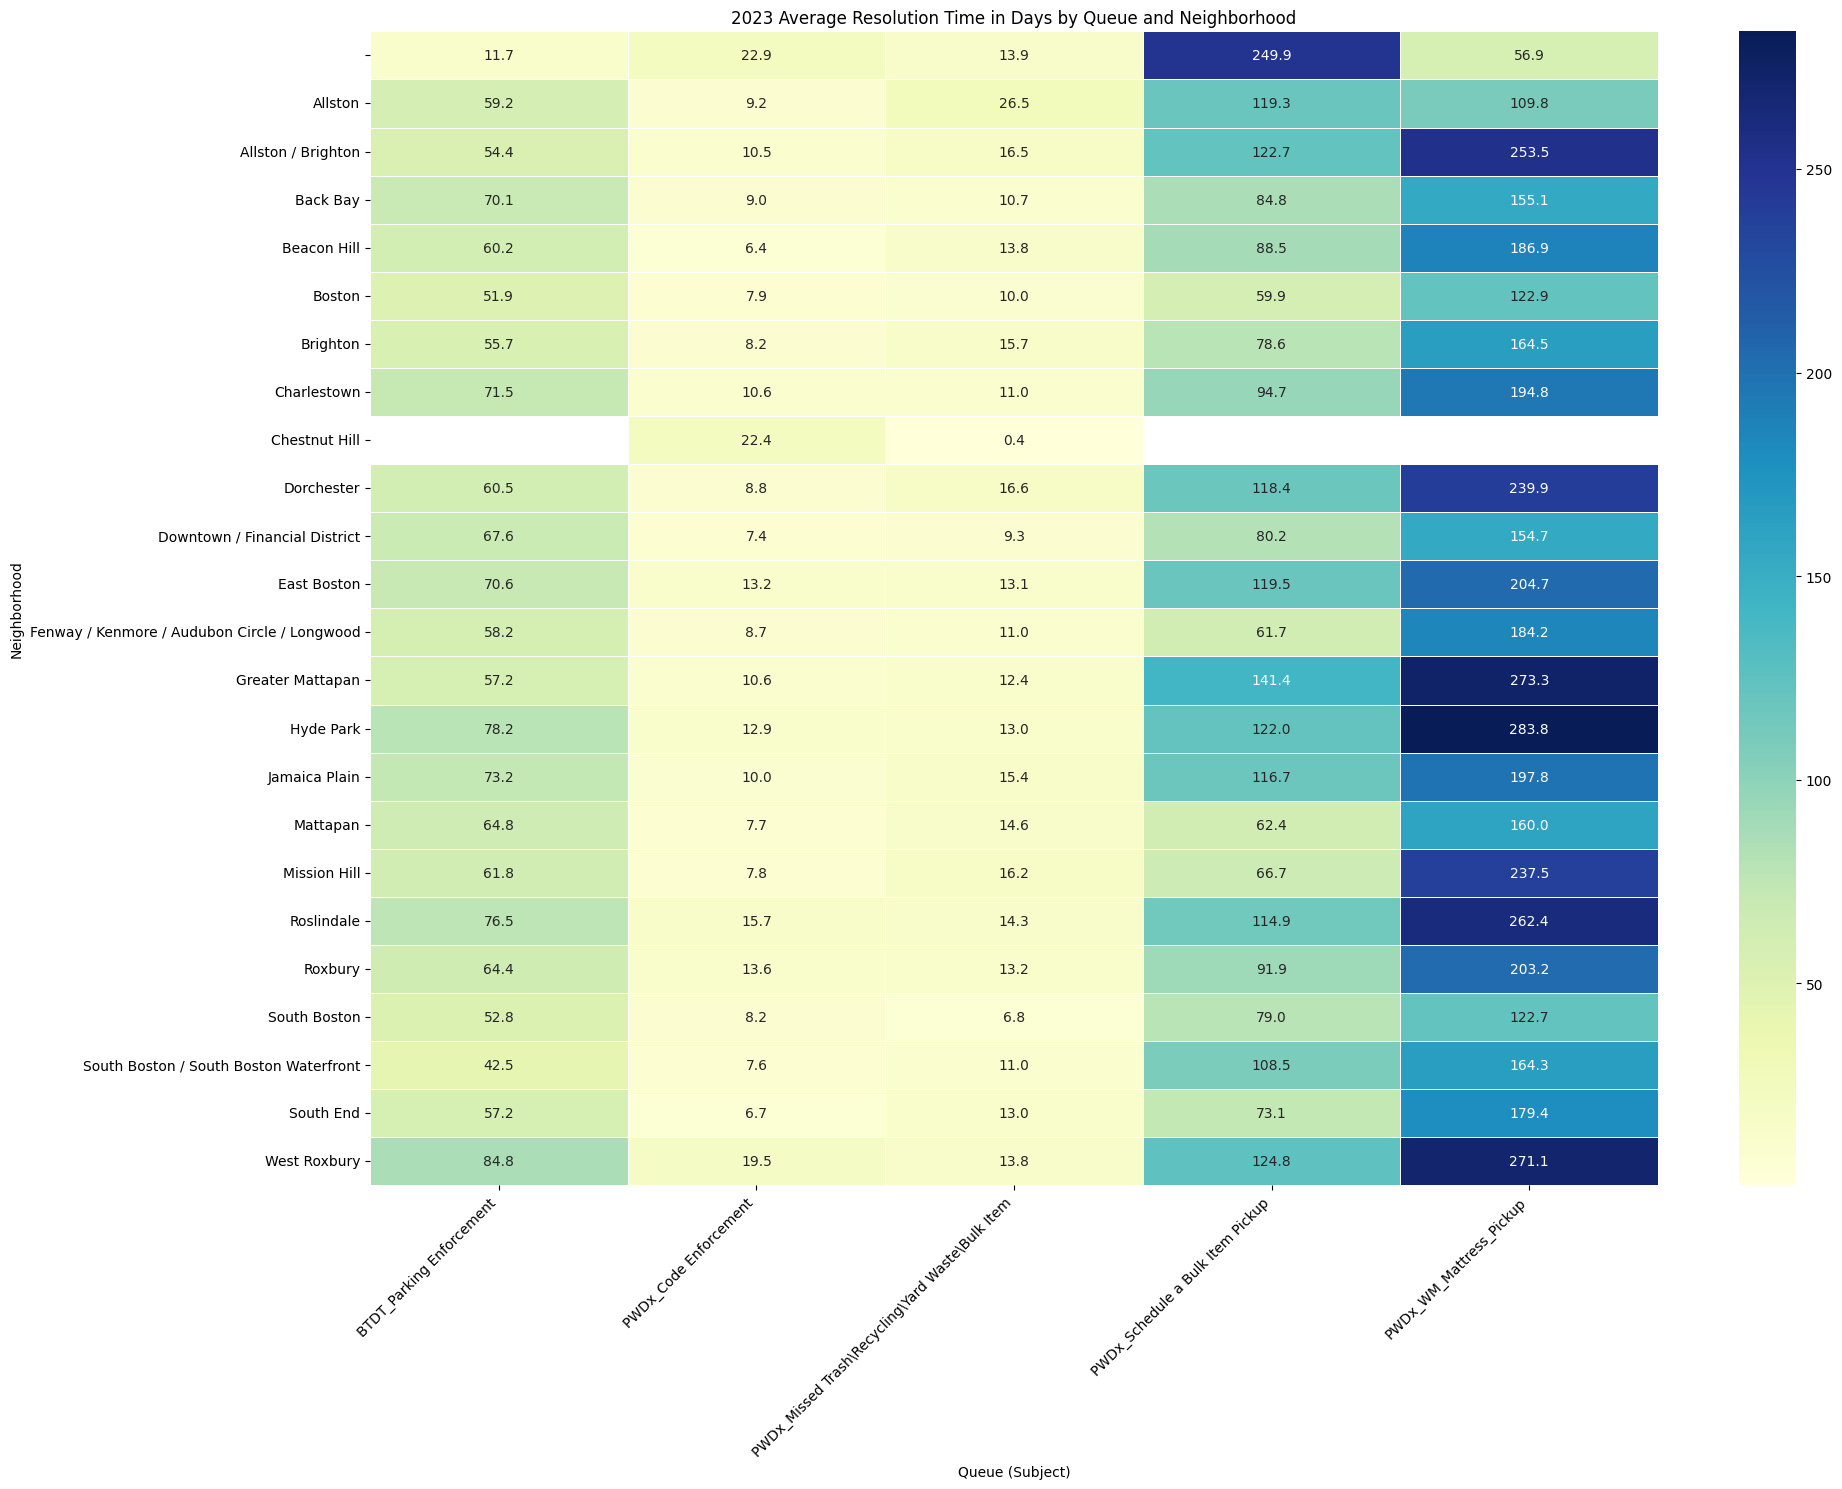

In [21]:
import seaborn as sns

# Identifying the top 10 most used queues across the dataset
top_queues = filtered_df['queue'].value_counts().head(5).index

avg_resolution_time_by_queue_neighborhood = filtered_df.groupby(['neighborhood', 'queue'])['resolution_time'].mean().reset_index()

# Filtering the dataset to include only the top 10 queues
filtered_top_queues_df = avg_resolution_time_by_queue_neighborhood[avg_resolution_time_by_queue_neighborhood['queue'].isin(top_queues)]

# Recreating the pivot table with top 10 queues
pivot_table_top_queues = filtered_top_queues_df.pivot(index='neighborhood', columns='queue', values='resolution_time')

# Plotting the heatmap for top 10 queues
plt.figure(figsize=(20, 15))
sns.heatmap(pivot_table_top_queues, annot=True, fmt=".1f", linewidths=.5, cmap="YlGnBu")
plt.title('2023 Average Resolution Time in Days by Queue and Neighborhood')
plt.xlabel('Queue (Subject)')
plt.ylabel('Neighborhood')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


For the year 2023 we do see that common queues like parking and code enforment have more consistent response times while queues like bulk item pickup vary greatly by neighborhood.


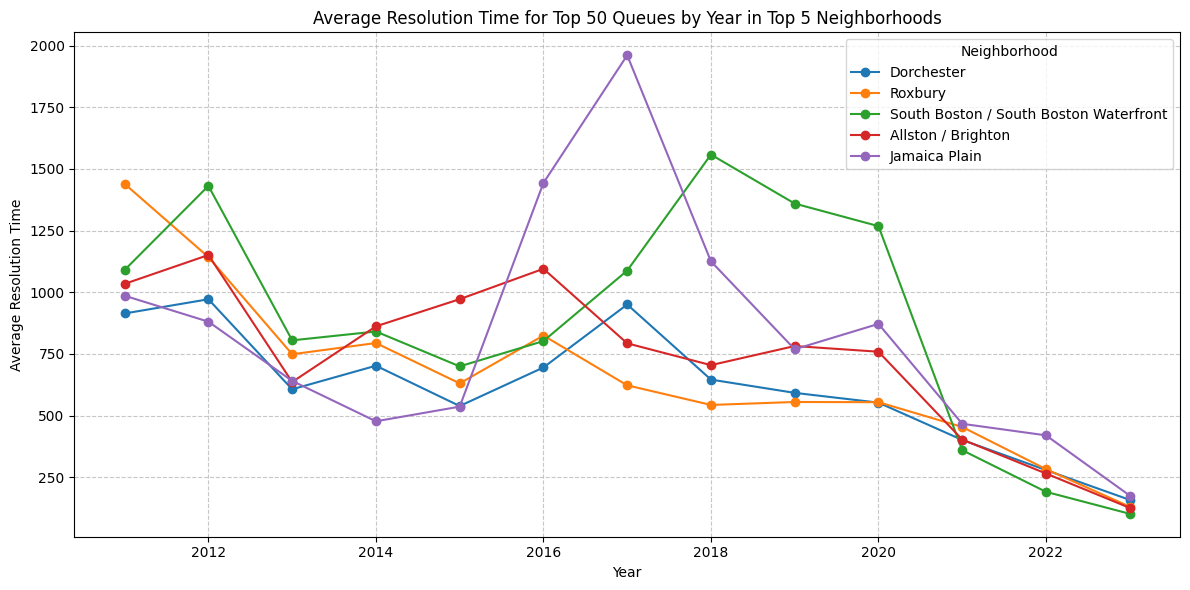

In [22]:

# Defining the top 5 neighborhoods with the most requests
top_5_neighborhoods_with_most_requests = df['neighborhood'].value_counts().head(5).index

# Setting the number of top queues to consider
N = 50

# Initializing an empty dictionary to store results for each neighborhood
neighborhood_results = {neighborhood: [] for neighborhood in top_5_neighborhoods_with_most_requests}

# Iterating over years and neighborhoods
for year in range(2011, 2024):
    year_data = df[df['year'] == year]
    for neighborhood in top_5_neighborhoods_with_most_requests:
        # Filter data for the specific neighborhood and year
        neighborhood_year_data = year_data[year_data['neighborhood'] == neighborhood]

        # Count the occurrences of each queue for the specific neighborhood and year
        queue_counts = neighborhood_year_data['queue'].value_counts()

        # Get the top N most common queues for the specific neighborhood and year
        top_queues = queue_counts.head(N).index.tolist()

        # Filter data for the top N queues
        filtered_data = neighborhood_year_data[neighborhood_year_data['queue'].isin(top_queues)]

        # Calculate the mean response time for the top N queues
        average_response_time = filtered_data['resolution_time'].mean()

        # Append the result to the respective neighborhood's list
        neighborhood_results[neighborhood].append({'year': year, 'average_response_time': average_response_time})

# Creating a line plot for each neighborhood
plt.figure(figsize=(12, 6))

for neighborhood in top_5_neighborhoods_with_most_requests:
    result_df = pd.DataFrame(neighborhood_results[neighborhood])
    plt.plot(result_df['year'], result_df['average_response_time'], marker='o', label=neighborhood)

plt.xlabel('Year')
plt.ylabel('Average Resolution Time')
plt.title(f'Average Resolution Time for Top {N} Queues by Year in Top 5 Neighborhoods')
plt.legend(title='Neighborhood')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


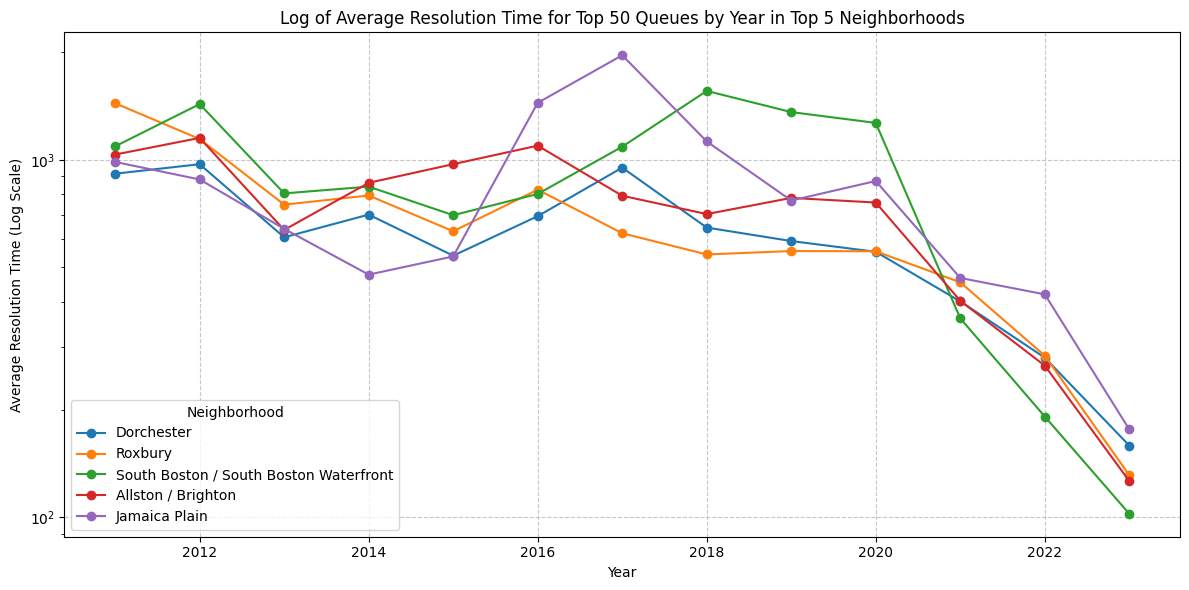

In [23]:
import numpy as np

# Creating a line plot with a logarithmic scale for each neighborhood
plt.figure(figsize=(12, 6))

for neighborhood in top_5_neighborhoods_with_most_requests:
    result_df = pd.DataFrame(neighborhood_results[neighborhood])
    # Using log scale for the average resolution time
    plt.semilogy(result_df['year'], result_df['average_response_time'], marker='o', label=neighborhood)

plt.xlabel('Year')
plt.ylabel('Average Resolution Time (Log Scale)')
plt.title(f'Log of Average Resolution Time for Top {N} Queues by Year in Top 5 Neighborhoods')
plt.legend(title='Neighborhood')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


We can see that the resolution times of these neighborhoods begin to converge after 2020, which aligns with the results from average resolution time by queue that show decline in goal resolution time after 2020. 